In [2]:
!pip install matplotlib

  Using cached contourpy-1.2.1-cp310-cp310-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -------------------------------------  163.8/165.5 kB 5.0 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 5.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 13.8 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/8.0 MB 12.7 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/8.0 MB 12.2 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.0 MB 12.0 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/8.0 MB 11.9 MB/s eta 0:00:01
   --------------- -------------

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 폰트가 정상적으로 설정되었는지 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 데이터 로드
file_path = './알리_베스트셀러_리뷰.csv'
data = pd.read_csv(file_path)

# 데이터 컬럼 확인
data.head(), data.columns


(                                                 상품명      가격   평점  \
 0  SCVCN 사이클링 안경 자전거 선글라스, 남성 UV400 안경, 스포츠 MTB 야...   1,391  4.7   
 1  역도 스트랩 실리콘 리프팅 손목 스트랩, 미끄럼 방지, 힘 훈련, 데드리프트 크로스...   1,391  4.8   
 2  야외 캠핑 생존 랜야드 낙하산 로프 하이킹 텐트 액세서리, 7 코어 550 파라코드...   1,125  4.7   
 3  접이식 대용량 접이식 왜건, 휴대용 유틸리티 카트, 쇼핑 비치 가든 풀 트롤리, 야...  25,785  4.7   
 4  BISINNA 접이식 바베큐 라운드 테이블 스토브, 휴대용 캠핑 바베큐 숯 그릴, ...  16,411  4.8   
 
                                                   댓글  \
 0                                                NaN   
 1  배송은 생각보다 빨리도착했네요 손목 스트랩 1쌍~레드 디자인 이쁘고 마감처리 깔끔하...   
 2  감사합니다\n지퍼 손잡이 매듭용으로 좋습니다\n잘받았습니다 잘받았습니다\n이색인줄은...   
 3  뭔 배송하면서 바닷물에 담궈서 가져오냐? 쓰기도 전에 녹슬어서 오는 메이드인 차이나...   
 4  생각보다 너무괜찮은데요? 후기좋은 이유가있엇네요 불판도생각보다 두껍고튼튼한듯ㅎ 저사...   
 
                                                   별점  \
 0                                                NaN   
 1  5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5...   
 2  5\n5\n5\n5\n5\n5\n5\n3\n5\n5\n5\n5\n4\n5\n4\n5...   
 3  5\

In [60]:
data.head()

,상품명,가격,평점,댓글,별점,링크
0,"SCVCN 사이클링 안경 자전거 선글라스, 남성 UV400 안경, 스포츠 MTB 야...","1,391",4.7,NaN,NaN,https://ko.aliexpress.com/item/100500592463696...
1,"역도 스트랩 실리콘 리프팅 손목 스트랩, 미끄럼 방지, 힘 훈련, 데드리프트 크로스...","1,391",4.8,배송은 생각보다 빨리도착했네요 손목 스트랩 1쌍~레드 디자인 이쁘고 마감처리 깔끔하...,5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5...,https://ko.aliexpress.com/item/100500592457862...
2,"야외 캠핑 생존 랜야드 낙하산 로프 하이킹 텐트 액세서리, 7 코어 550 파라코드...","1,125",4.7,감사합니다\n지퍼 손잡이 매듭용으로 좋습니다\n잘받았습니다 잘받았습니다\n이색인줄은...,5\n5\n5\n5\n5\n5\n5\n3\n5\n5\n5\n5\n4\n5\n4\n5...,https://ko.aliexpress.com/item/100500522141320...
3,"접이식 대용량 접이식 왜건, 휴대용 유틸리티 카트, 쇼핑 비치 가든 풀 트롤리, 야...","25,785",4.7,뭔 배송하면서 바닷물에 담궈서 가져오냐? 쓰기도 전에 녹슬어서 오는 메이드인 차이나...,5\n5\n5\n5\n5\n5\n4\n4\n5\n5\n5\n5\n5\n5\n5\n4...,https://ko.aliexpress.com/item/100500593200533...
4,"BISINNA 접이식 바베큐 라운드 테이블 스토브, 휴대용 캠핑 바베큐 숯 그릴, ...","16,411",4.8,생각보다 너무괜찮은데요? 후기좋은 이유가있엇네요 불판도생각보다 두껍고튼튼한듯ㅎ 저사...,5\n5\n5\n5\n5\n5\n5\n5\n5\n4\n5\n5\n5\n5\n5\n5...,https://ko.aliexpress.com/item/100500626084886...


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상품명     291 non-null    object 
 1   가격      291 non-null    object 
 2   평점      291 non-null    float64
 3   댓글      265 non-null    object 
 4   별점      286 non-null    object 
 5   링크      291 non-null    object 
dtypes: float64(1), object(5)
memory usage: 13.8+ KB


In [63]:
# '가격' 열에서 숫자만 추출
def extract_price(price_str):
    match = re.search(r'\d+', str(price_str))
    return int(match.group()) if match else None

# '가격' 열의 문자열에서 쉼표(,)를 제거하고 숫자로 변환
data['가격'] = data['가격'].str.replace(',', '').astype(int)


In [66]:
# 데이터 정규화
normalized_prices = (data['가격'] - data['가격'].min()) / (data['가격'].max() - data['가격'].min())

In [67]:
# 정규화된 데이터를 가격 범위에 따라 그룹화
def categorize_normalized_price(price, min_price, max_price):
    real_price = price * (max_price - min_price) + min_price
    if real_price <= 5000:
        return '0~5000원'
    elif real_price <= 10000:
        return '5001~10000원'
    elif real_price <= 20000:
        return '10001~20000원'
    elif real_price <= 30000:
        return '20001~30000원'
    else:
        return '그외'
    
min_price = data['가격'].min()
max_price = data['가격'].max()
data['가격 범위'] = normalized_prices.apply(categorize_normalized_price, args=(min_price, max_price))


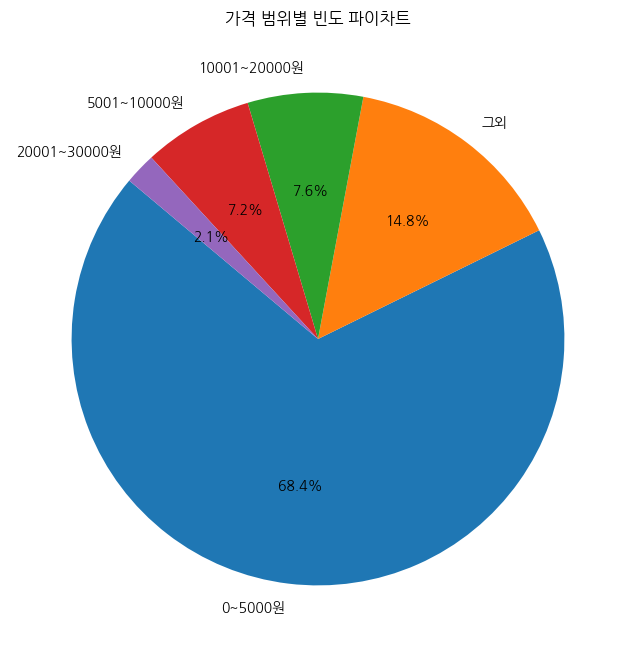

In [69]:
# 가격 범위 카운트
price_range_counts = data['가격 범위'].value_counts()

# 파이차트 생성
plt.figure(figsize=(10, 8))
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('가격 범위별 빈도 파이차트')
plt.show()